# Hierarchical Clustering and Plotting a Dendrogram

In [34]:
xCoord <- c(rnorm(10, mean = 5, sd =0.8),rnorm(10, mean = 10, sd =0.8),rnorm(10, mean = 7.5, sd =0.8) )

In [35]:
yCoord <- c(rnorm(10, mean = 0, sd =0.8),rnorm(10, mean = 0, sd =0.8),rnorm(10, mean = 5, sd =0.8) )

In [36]:
data <- data.frame(X = xCoord, Y = yCoord)

In [4]:
str(data)



'data.frame':	30 obs. of  2 variables:
 $ X: num  5.81 5.71 5.36 4.68 4.47 ...
 $ Y: num  -0.646 0.3377 -0.1119 0.0516 0.3301 ...


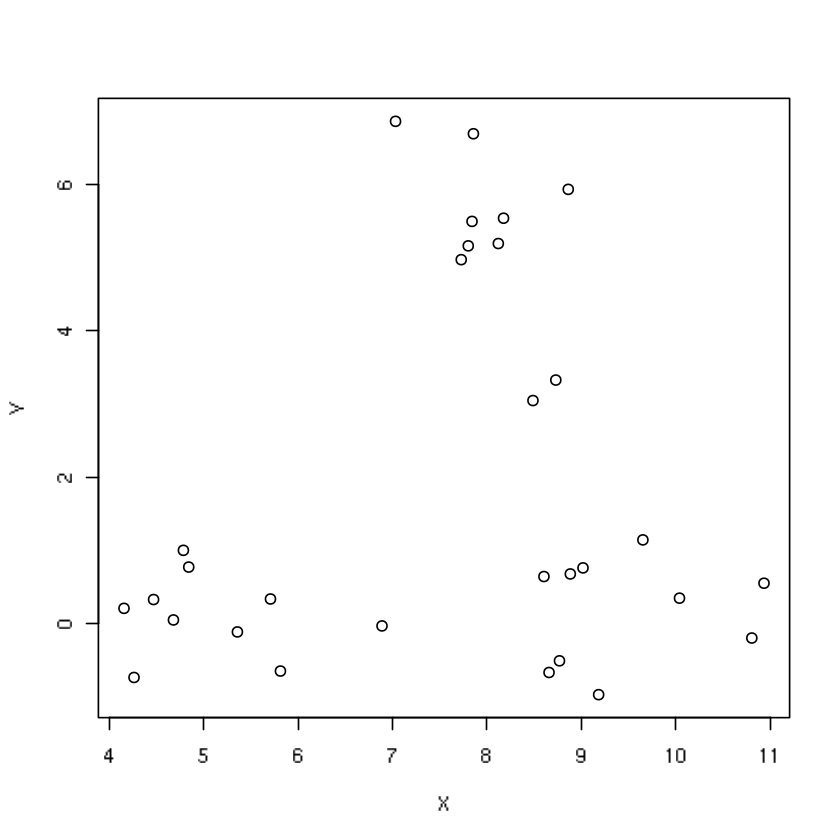

In [5]:
plot(data)

In [6]:
distanceMtx <- dist(data, method =  "euclidean")

In [7]:
clusteringResults <- hclust(distanceMtx)

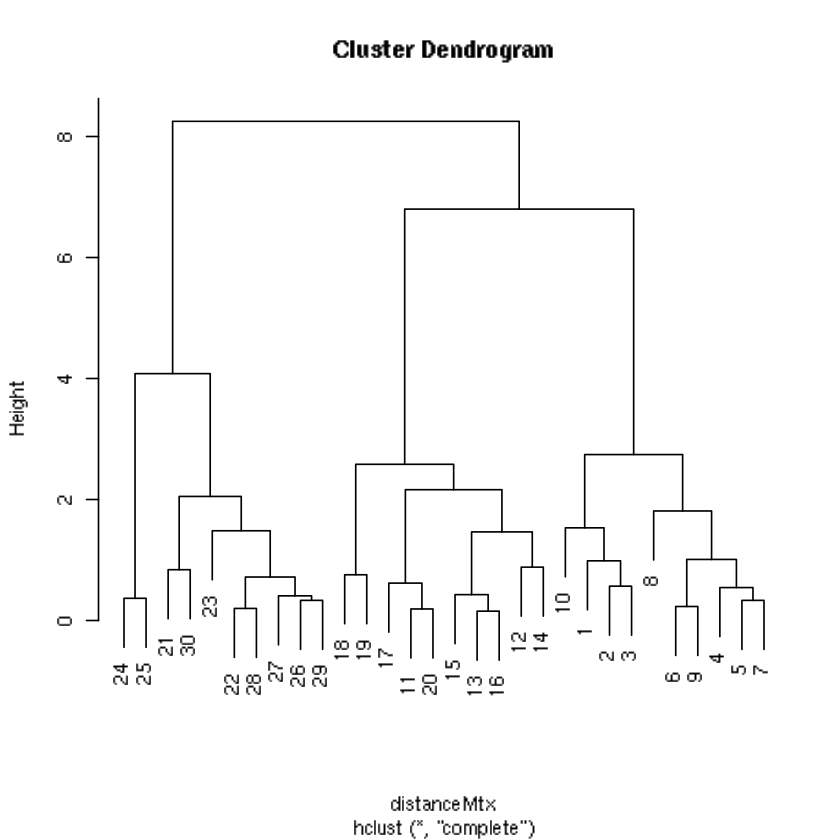

In [9]:
plot(clusteringResults) 

In [10]:
#Showing merging process step by step
clusteringResults$merge

-13,-16
-11,-20
-22,-28
-6,-9
-5,-7
-26,-29
-24,-25
-27,6
-15,1
-4,5
-2,-3


In [11]:
print(clusteringResults)


Call:
hclust(d = distanceMtx)

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 30 



# K - means cluster analysis

In [46]:
km <- kmeans(data, 3, nstart = 20)


In [53]:
km$iter # number of iterations

[1] 2

In [54]:
km$size # the number of points in each cluster

[1] 10 10 10

In [59]:
TWSS <- km$totss # total sum of squares

In [56]:
km$withinss # Vector of within-cluster sum of squares, one component per cluster.

[1] 14.84246 11.75693 11.46580

In [60]:
WSS<-km$tot.withinss # Total within-cluster sum of squares, i.e. sum(withinss)

In [61]:
# Adjusted Coefficient of Determination
R_squared = 1 - ( WSS*(nrow(data) - 1) ) / ( TWSS*(nrow(data) - 3) )

In [62]:
R_squared 

[1] 0.8659419

In [47]:
km

K-means clustering with 3 clusters of sizes 10, 10, 10

Cluster means:
         X         Y
1 9.698494 0.4035089
2 7.428538 5.1617410
3 5.055305 0.1588223

Clustering vector:
 [1] 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2

Within cluster sum of squares by cluster:
[1] 14.84246 11.75693 11.46580
 (between_SS / total_SS =  87.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

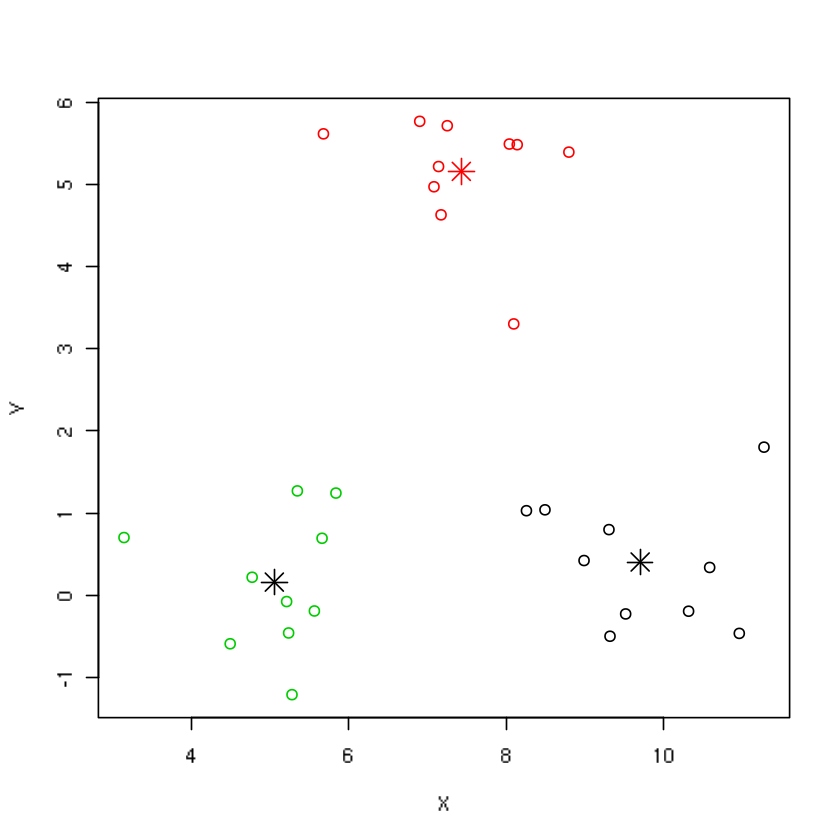

In [48]:
plot(data, col = km$cluster)
points(km$centers, col = 1:2, pch = 8, cex = 2)

## Analysis of diversity of the clusters using BoxPlot

In [49]:
class_assignments <- fitted(km, method = "classes")

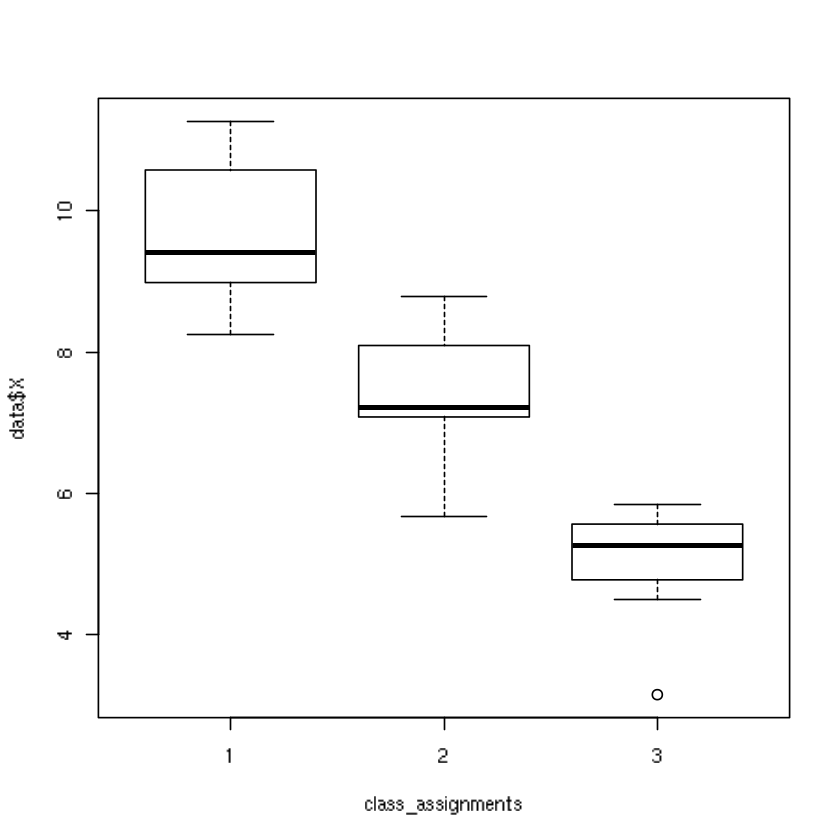

In [50]:
boxplot(data$X~class_assignments)

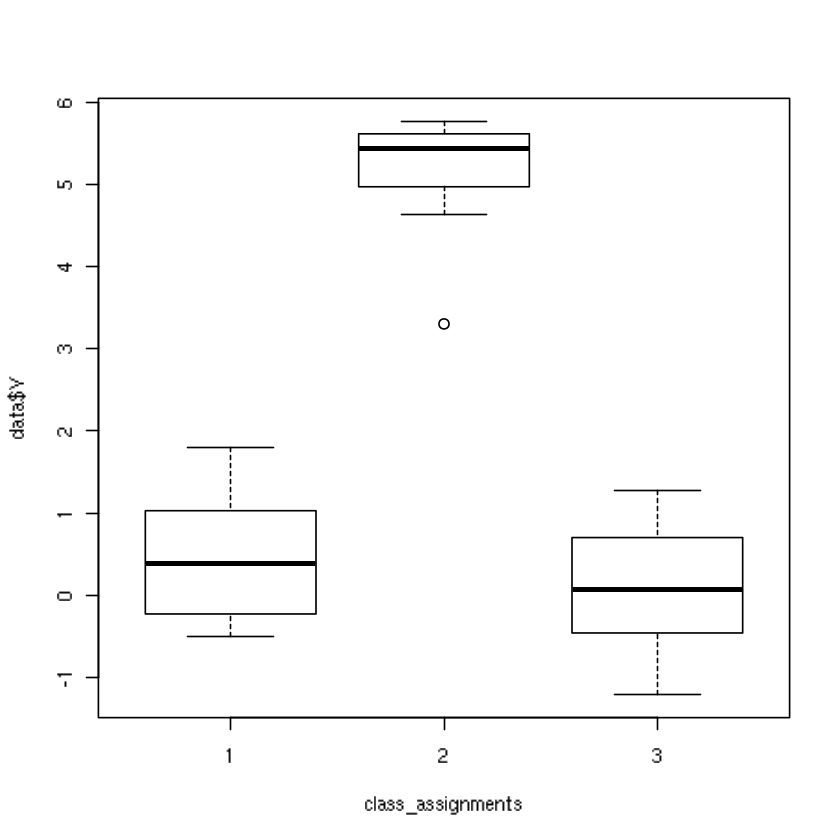

In [51]:
boxplot(data$Y ~ class_assignments)